In [1]:
## importing all the required libraries to perform the classification task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## importing the nltk library to remove the stop words
import nltk
from nltk.corpus import stopwords

In [3]:
## assigning the the columns to a variable yelptrainx
yelptrainx = pd.read_csv('yelpmultilabelX.csv')

In [4]:
## assiging the labels to a variable yelptrainy
yelptrainy = pd.read_csv('yelpmultilabelY.csv')

In [5]:
##assigning the text reviews to X
X = yelptrainx['text']

In [6]:
## printing out the first review
X[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [7]:
## Function to remove punctuations and stop words from each of the review
import string
def text_process(text):
        nopunc = [char for char in text if char not in string.punctuation]
        nopunc = ''.join(nopunc)
        return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [8]:
## importing count vectorizer to convert the list of tokens obtained from the above text_process function
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
## an instance is fitted to convert all the text reviews into vector format
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [10]:
## size of the vocabulary stored in the vetorizer
len(bow_transformer.vocabulary_)

29725

In [11]:
## transforming our X dataframe into a sparse matrix
X = bow_transformer.transform(X)

In [12]:
## shape of new X
print('Shape of Sparse Matrix: ', X.shape)
print('Amount of Non-Zero occurrences: ', X.nnz)
density = (100.0 * X.nnz / (X.shape[0] * X.shape[1]))
print('Density: {}'.format((density)))

Shape of Sparse Matrix:  (4645, 29725)
Amount of Non-Zero occurrences:  321139
Density: 0.23258701715854246


In [13]:
## importing train test split
from sklearn.model_selection import train_test_split

In [14]:
## assingning the yelptrainy to variable y
y=yelptrainy

In [15]:
## splitting the X and y into train and test data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [16]:
## importing a multilabel classifier chain library 
from skmultilearn.problem_transform import ClassifierChain

In [17]:
## import gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

In [17]:
## importing a multilabel binary relevance library 
from skmultilearn.problem_transform import BinaryRelevance

In [19]:
## building a classifier using Gaussian NB in Binary Relevance
classifier = BinaryRelevance(GaussianNB())

In [20]:
##fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=GaussianNB(priors=None),
        require_dense=[True, True])

In [21]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [67]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.302475780409042

In [68]:
## import KNN
from sklearn.neighbors import KNeighborsClassifier

In [69]:
## building a classifier using KNN in Binary Relevance
classifier = BinaryRelevance(KNeighborsClassifier())

In [70]:
##fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
        require_dense=[True, True])

In [71]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [72]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5123789020452099

In [82]:
## import Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

In [83]:
## building a classifier using Multinomial Naive Bayes in Binary Relevance
classifier = BinaryRelevance(MultinomialNB())

In [84]:
##fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True),
        require_dense=[True, True])

In [85]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [86]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.5629709364908504

In [19]:
## import Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [102]:
## building a classifier using Decision Tree
classifier=DecisionTreeClassifier(random_state=0)

In [103]:
## using cross validation
from sklearn.model_selection import cross_val_score

In [104]:
## using 10 fold cross validation
scores=cross_val_score(classifier,X_train,y_train, cv=10)

In [105]:
## accuracy from the cross validation 
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(),
                                          scores.std()),
                                          end="\n\n" )

mean: 0.915 (std: 0.013)



In [106]:
cross_val_score(classifier,X_train,y_train, cv=10)

array([0.91935484, 0.93010753, 0.89247312, 0.91129032, 0.89784946,
       0.91666667, 0.92183288, 0.93530997, 0.92183288, 0.90296496])

In [107]:
## visulaizing the decision tree
import graphviz 

classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [108]:
##importing tree
from sklearn import tree

In [109]:
##importing StringIO
from sklearn.externals.six import StringIO 

In [110]:
##importing Image to visualize the tree
from IPython.display import Image

In [111]:
## importing export_graphiviz
from sklearn.tree import export_graphviz

In [112]:
import pydotplus

In [113]:
dot_data = StringIO()

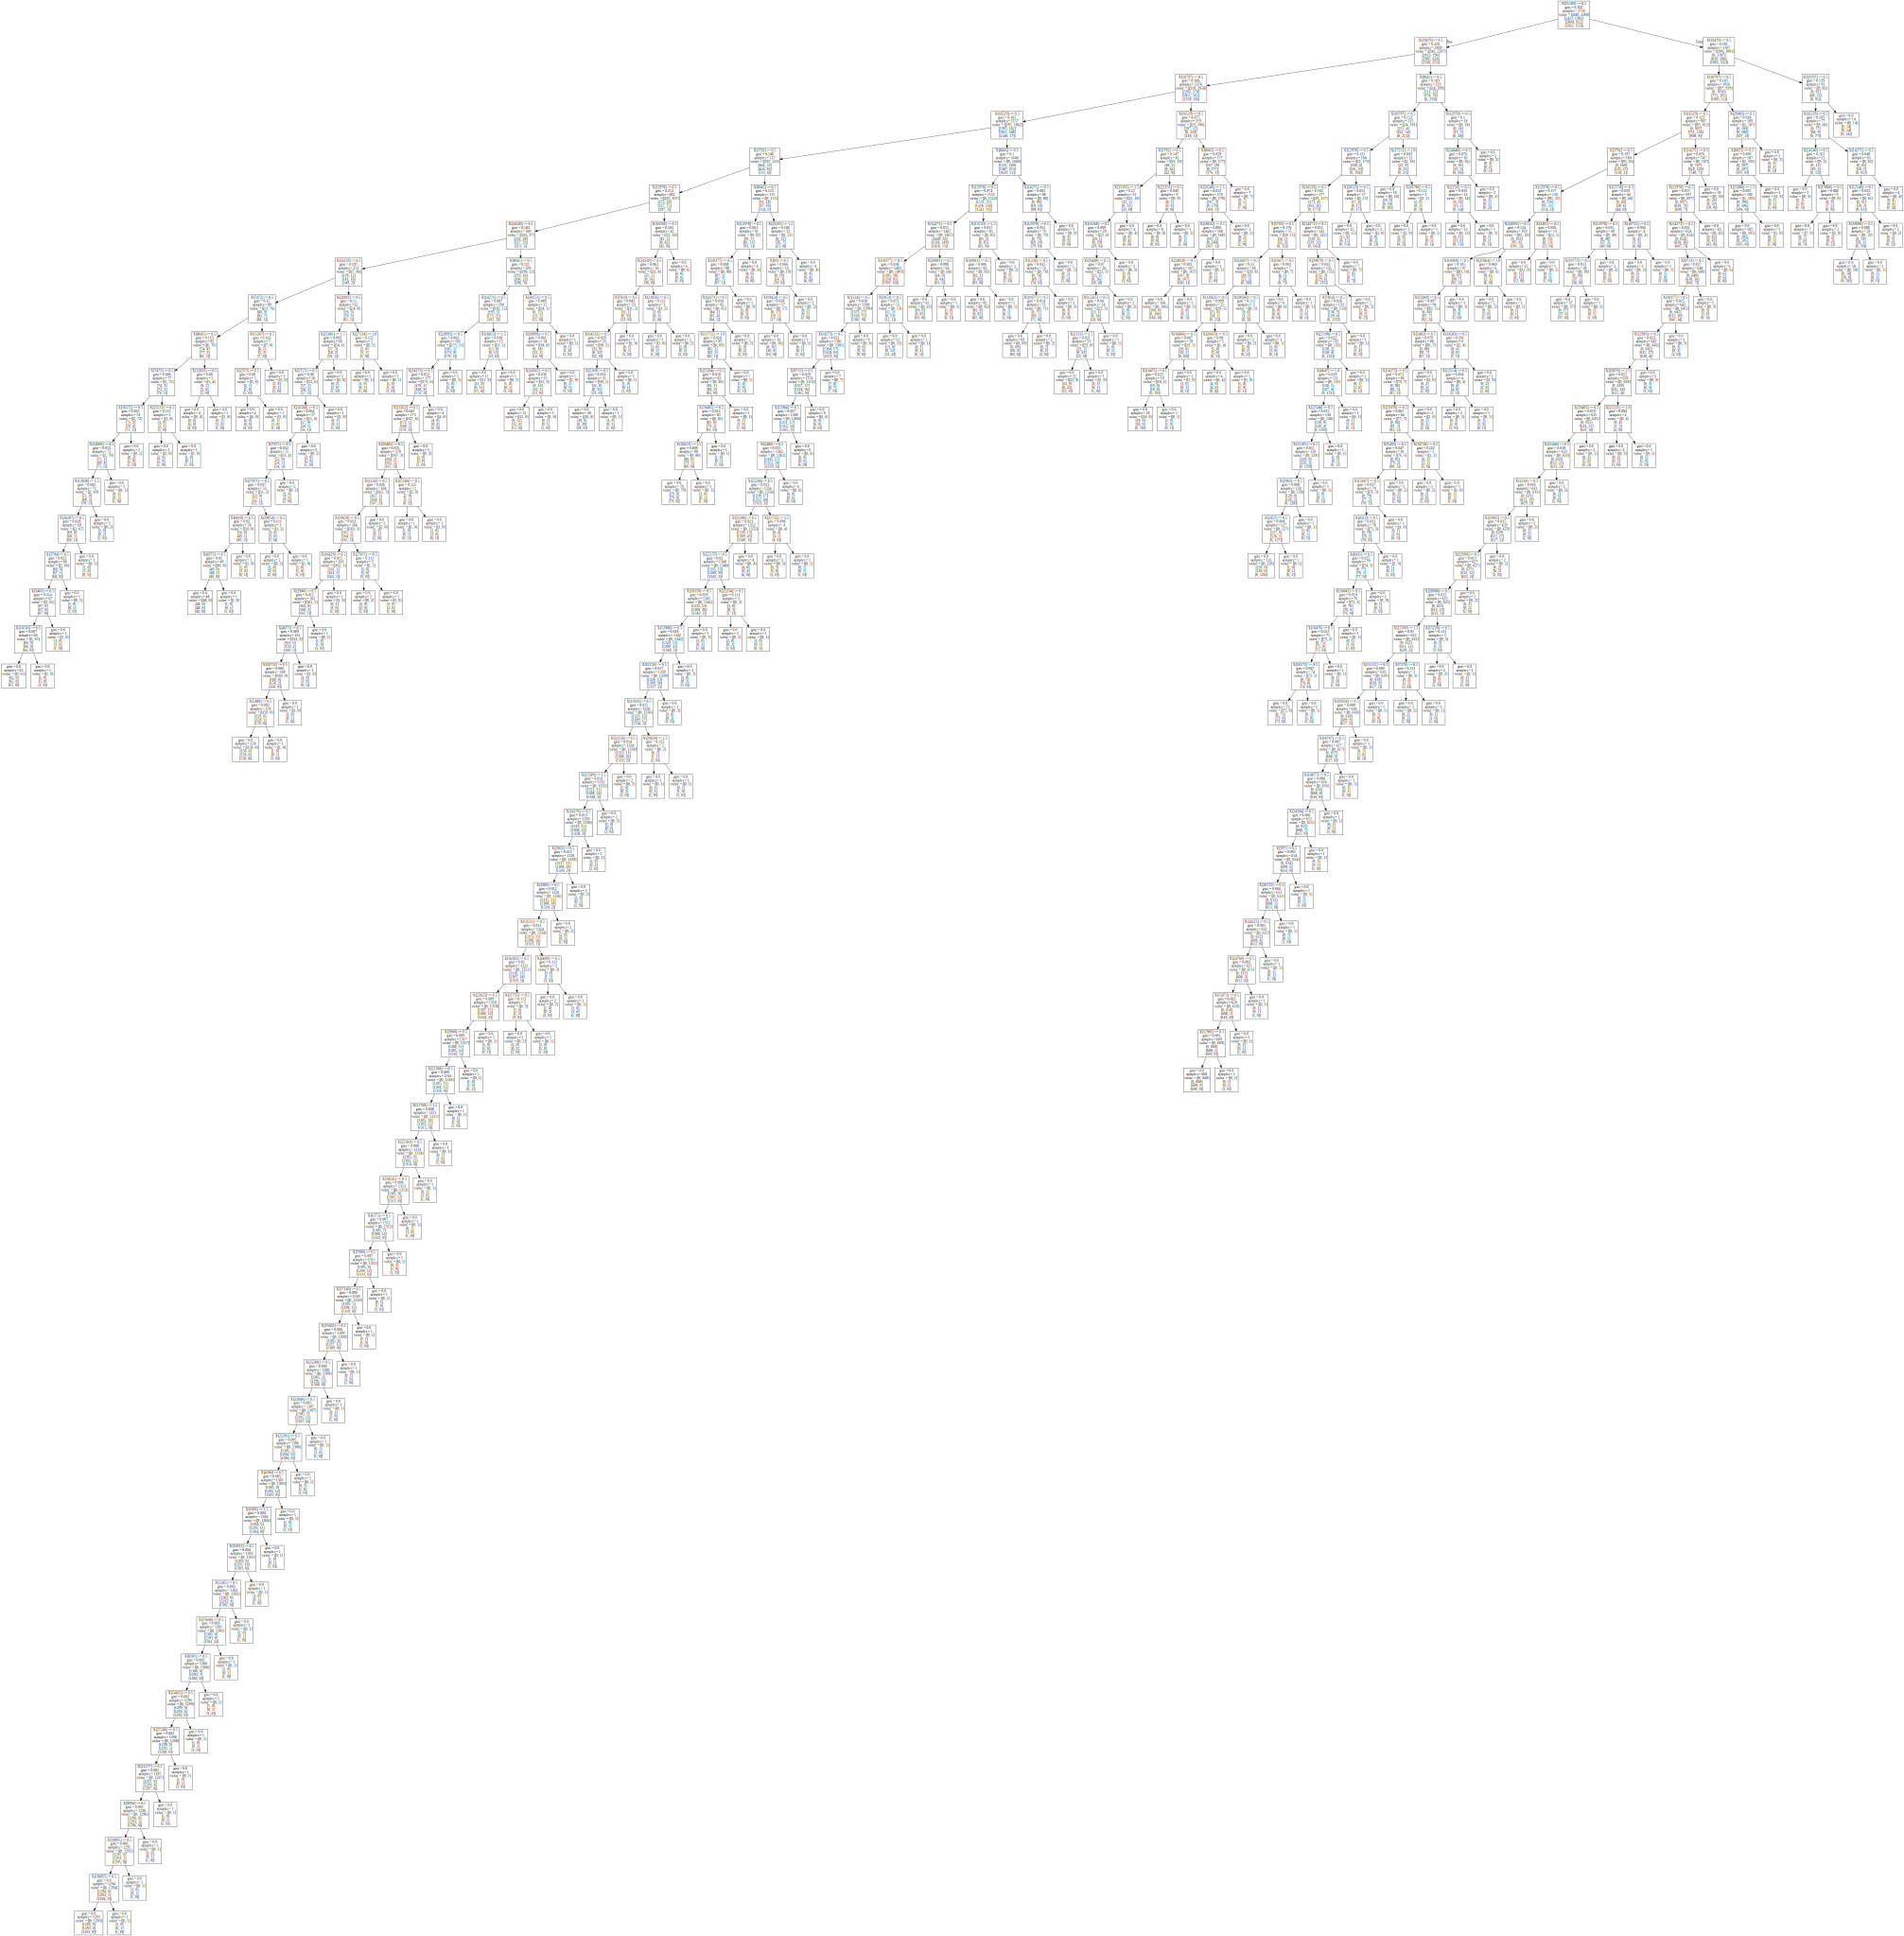

In [114]:
## Deciscion tree visualization
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(classifier, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [116]:
## importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
## building a classifier using Random Forest Classifier in Binary Relevance
classifier = BinaryRelevance(RandomForestClassifier())

In [118]:
##fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        require_dense=[True, True])

In [119]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [120]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.7244348762109796

In [24]:
## building a classifier using Deciscion tree using binary relevance 
classifier = BinaryRelevance(DecisionTreeClassifier())

In [25]:
##fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
        require_dense=[True, True])

In [26]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [27]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.9677072120559742

In [19]:
## import Linear SVC
from sklearn.svm import LinearSVC

In [20]:
## building a classifier using Linear SVC Classifier in Binary Relevance
classifier = BinaryRelevance(LinearSVC())

In [21]:
## fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
        require_dense=[True, True])

In [22]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [24]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.930032292787944

In [29]:
## import Extra tree classifier
from sklearn.tree import ExtraTreeClassifier

In [30]:
## building a classifier using Extra tree Classifier in Binary Relevance
classifier = BinaryRelevance(ExtraTreeClassifier())

In [31]:
## fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random'),
        require_dense=[True, True])

In [32]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [33]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.40904198062432723

In [34]:
## import Extra tree classifier
from sklearn.tree import ExtraTreeClassifier

In [35]:
## building a classifier using Extra tree Classifier in Binary Relevance
classifier = BinaryRelevance(ExtraTreeClassifier())

In [36]:
## fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, random_state=None,
          splitter='random'),
        require_dense=[True, True])

In [37]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [38]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.4155005382131324

In [39]:
## import Extra trees classifier
from sklearn.ensemble import ExtraTreesClassifier

In [40]:
## building a classifier using Extra trees Classifier in Binary Relevance
classifier = BinaryRelevance(ExtraTreesClassifier())

In [41]:
## fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        require_dense=[True, True])

In [42]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [43]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
accuracy_score(y_test,predictions)

0.5575888051668461

In [18]:
## import MLP classifier
from sklearn.neural_network import MLPClassifier

In [19]:
## building a classifier using MLP Classifier in Binary Relevance
classifier = BinaryRelevance(MLPClassifier())

In [20]:
## fitting the classifier
classifier.fit(X_train, y_train)

BinaryRelevance(classifier=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
        require_dense=[True, True])

In [21]:
## predicting the label against the test data 
predictions = classifier.predict(X_test)

In [22]:
## importing the accuracy score and determining the accuracy by testing the predicted label with test data original label
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.581270182992465

In [37]:
## a review is taken to predict and check whether the classifier has predicted the categories of the review correct 
review = yelptrainx['text'][11]

In [38]:
## The content of the review
review

'They must have renovated this place in the last year. It is now spacious and airy and there is no longer the dreaded "hover over a table to get a seat" necessity.  It now reminds me much more of the dreaded "Panera Bread" chain in California, but the food is still much better and has much less of a "mass produced" feeling and taste.\n\nThe service (management, staff etc) were extremely attentive and responsive to requests as well as keeping the place extremely well clean and cleared.\n\nI love carbs...Carbs with carbs and a side of carbs.  They serve warm syrup with their pancakes (yum!) and their bread is just amazing.  \n\nThe "side of pancakes" is plenty big for a meal and they are always consistent, fluffy, and tasty.  \n\nThey offer both a dark roast and a house roast for coffee and all the powdery loveliness (cinnamon, nutmeg, cocoa) to top it off just right.\n\nToday, before returning to the land of freeways and smog and eternal sunshine(well, the other land of that anyway) we 

In [40]:
## The review is then pre-processsed by feature extraction and vectorisation 
review_transformed = bow_transformer.transform([review])

In [42]:
## Predicting the transformed review with the best classifier determined 
predict.toarray()

array([[1, 1, 1, 0]], dtype=int64)

In [43]:
## a review is taken to predict and check whether the classifier has predicted the categories of the review correct 
review = yelptrainx['text'][57]

In [44]:
## The content of the review
review

'Excellent service and food.\n\nVery clean.\n\nFriendly folks.\n\nBeautiful patio'

In [45]:
## The review is then pre-processsed by feature extraction and vectorisation 
review_transformed = bow_transformer.transform([review])

In [46]:
## Predicting the transformed review with the best classifier determined 
predict=classifier.predict(review_transformed)[0]

In [47]:
## The categories of the reviews
predict.toarray()

array([[1, 1, 1, 0]], dtype=int64)

In [38]:
## a review is taken to predict and check whether the classifier has predicted the categories of the review correct 
review = yelptrainx['text'][56]

In [39]:
## The content of the review
review

"Too bad about Mandalay Noodle World. Maybe if they had stressed better service and played up the Burmese aspect they would have had better luck. Who knows?\n\nBetito's moved in, and they're okay. The wife and I stopped in yesterday. I had a carne asada torta and a taco and both were about average. Their hot salsa took it up a notch though. My wife had something with diablo in the name (sorry, I'll have to look at the menu when I get home) and loved it. They do the usual menudo on weekends and the whole place is more or less along the lines of a Filiberto's--not that there's anything wrong with that. The whole bill was less that $20, so prices are good. \n\nClean enough place, cheap, food is okay, and service is adequate. I would not go out of my way to get there, but if it is in your neighborhood it is worth a try. I'll probably stop here from time to time."

In [40]:
## The review is then pre-processsed by feature extraction and vectorisation 
review_transformed = bow_transformer.transform([review])

In [41]:
## Predicting the transformed review with the best classifier determined 
predict=classifier.predict(review_transformed)[0]

In [42]:
## The categories of the reviews
predict.toarray()

array([[1, 1, 1, 1]], dtype=int64)

In [59]:
## The label of the reviews are in order of Food,Service,Ambience and Worthiness
y.head()

,food,service,ambience,worthiness
0,1,0,0,0
1,1,1,0,0
2,1,0,1,0
3,1,0,0,0
4,1,1,1,0
